# Building a model that predicts whether a passanger on Titanic survived or not

In [1]:
#Importing all the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression


# Importing the data set


In [2]:
data=pd.read_csv('tested.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#The tested data set has 418 entries and 12 features. I am listing out the features with short description
survival: Survival
Pclass: Ticket
PassengerID: ID 
Sex: Gender
Age: Age in years
SibSp: Siblings or Spouses 
Parch: Parents or children
Ticket: Ticket 
Fare: Passanger 
Cabin: CabinNumber
Embarked:  PortofEmbarkation

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [6]:
data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [7]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
#lets find out the features which could contribute to a high survial rate
# 1. Age and Sex
data.groupby('Survived').size()

Survived
0    266
1    152
dtype: int64

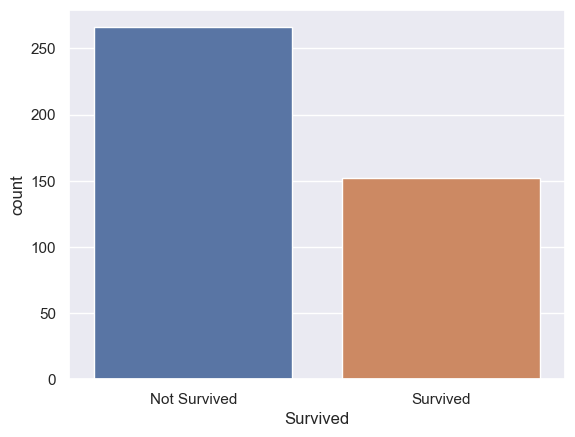

In [9]:
sns.countplot(x='Survived',data=data)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

In [10]:
data.groupby('Sex').size()

Sex
female    152
male      266
dtype: int64

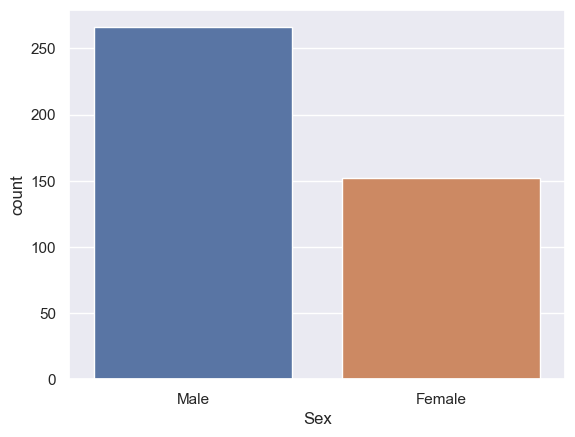

In [11]:
sns.countplot(x='Sex',data=data)
plt.xticks([0,1],['Male','Female'])
plt.show()

<Axes: >

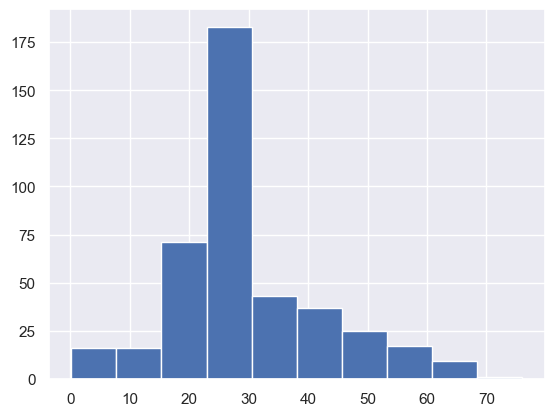

In [12]:
data['Age'].hist()

# Pclass 

<Axes: xlabel='Pclass', ylabel='Survived'>

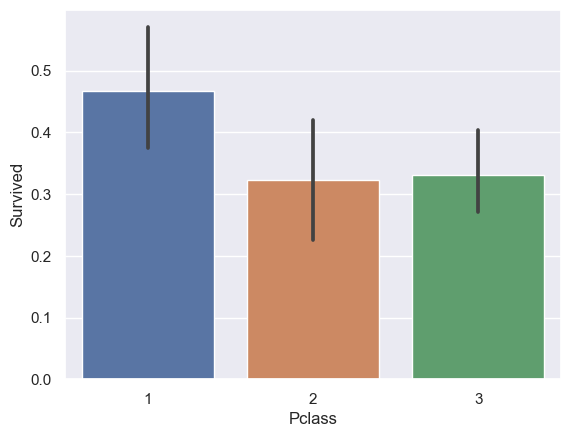

In [13]:
sns.barplot(x='Pclass',y='Survived',data=data)

C:\Users\Ivy Sarkar\anaconda4\envs\ml\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


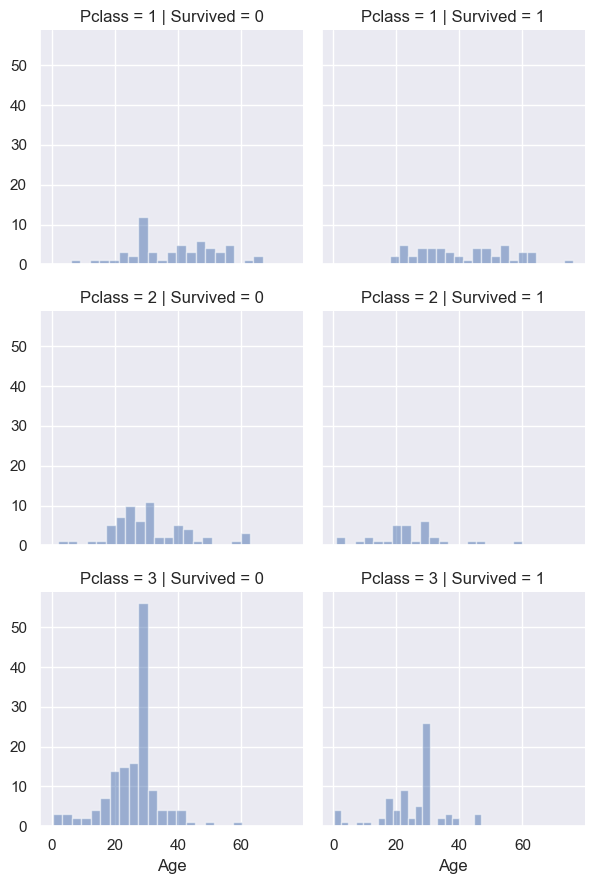

In [14]:
grid=sns.FacetGrid(data,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

# SibSp and Parch
Finding out if someone is alone or not

In [15]:
data['relatives']=data['SibSp']+data['Parch']
data.loc[data['relatives']>0,'not_alone']=0
data.loc[data['relatives']==0,'not_alone']=1
data['not_alone']=data['not_alone'].astype(int)
data['not_alone'].value_counts()

not_alone
1    253
0    165
Name: count, dtype: int64

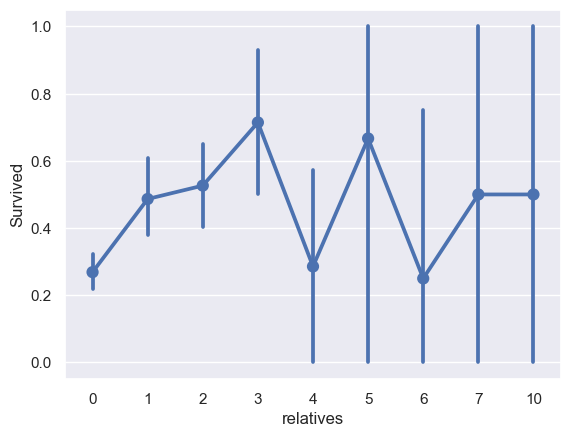

In [16]:
axes=sns.pointplot(x='relatives',y='Survived', data=data)

# Data Preprocessing
Missing Data 
(Extracting the data and creating a new feature into numeric variable. The missing values will be converted to zero)

In [17]:
import re
deck={'A':1,"B":2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data['Cabin']=data['Cabin'].fillna('U1')
data['Deck']=data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck']=data['Deck'].map(deck)
data['Deck']=data['Deck'].fillna(0)
data['Deck']=data['Deck'].astype(int)

#Dropping the cabin feature
data=data.drop(['Cabin'],axis=1)
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,1,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0,1,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,0,1,3
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1,0
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0,1,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
 11  relatives    418 non-null    int64  
 12  not_alone    418 non-null    int32  
 13  Deck         418 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(4)
memory usage: 42.6+ KB


# Converting Fare from float to int64

In [19]:
data['Fare']=data['Fare'].fillna(0)
data['Fare']=data['Fare'].astype(int)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7,Q,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7,S,1,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9,Q,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8,S,0,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12,S,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8,S,0,1,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108,C,0,1,3
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7,S,0,1,0
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8,S,0,1,0


# Extracting the names of the passengers and dropping them 

In [20]:
titles={'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5}
data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
data['Title']=data['Title'].replace(['Lady','Countness','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
data['Title']=data['Title'].replace('Mlle','Miss')
data['Title']=data['Title'].replace('Ms','Miss')
data['Title']=data['Title'].replace('Mme','Mrs')
data['Title']=data['Title'].map(titles)
#filling NaN with 0
data['Title']=data['Title'].fillna(0)
#drop the missing the values
data=data.drop(['Name'],axis=1)
data



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,0,3,male,34.50000,0,0,330911,7,Q,0,1,0,1
1,893,1,3,female,47.00000,1,0,363272,7,S,1,0,0,2
2,894,0,2,male,62.00000,0,0,240276,9,Q,0,1,0,1
3,895,0,3,male,27.00000,0,0,315154,8,S,0,1,0,1
4,896,1,3,female,22.00000,1,1,3101298,12,S,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.27259,0,0,A.5. 3236,8,S,0,1,0,1
414,1306,1,1,female,39.00000,0,0,PC 17758,108,C,0,1,3,5
415,1307,0,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7,S,0,1,0,1
416,1308,0,3,male,30.27259,0,0,359309,8,S,0,1,0,1


# Converting the sex feature into numeric

In [21]:
gender={'male':0,'female':1}
data['Sex']=data['Sex'].map(gender)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,0,3,0,34.50000,0,0,330911,7,Q,0,1,0,1
1,893,1,3,1,47.00000,1,0,363272,7,S,1,0,0,2
2,894,0,2,0,62.00000,0,0,240276,9,Q,0,1,0,1
3,895,0,3,0,27.00000,0,0,315154,8,S,0,1,0,1
4,896,1,3,1,22.00000,1,1,3101298,12,S,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,30.27259,0,0,A.5. 3236,8,S,0,1,0,1
414,1306,1,1,1,39.00000,0,0,PC 17758,108,C,0,1,3,5
415,1307,0,3,0,38.50000,0,0,SOTON/O.Q. 3101262,7,S,0,1,0,1
416,1308,0,3,0,30.27259,0,0,359309,8,S,0,1,0,1


In [22]:
data['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [23]:
#As 363 are unique tickets I will drop out the ticket category from the dataset
data=data.drop(['Ticket'],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,0,3,0,34.50000,0,0,7,Q,0,1,0,1
1,893,1,3,1,47.00000,1,0,7,S,1,0,0,2
2,894,0,2,0,62.00000,0,0,9,Q,0,1,0,1
3,895,0,3,0,27.00000,0,0,8,S,0,1,0,1
4,896,1,3,1,22.00000,1,1,12,S,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,30.27259,0,0,8,S,0,1,0,1
414,1306,1,1,1,39.00000,0,0,108,C,0,1,3,5
415,1307,0,3,0,38.50000,0,0,7,S,0,1,0,1
416,1308,0,3,0,30.27259,0,0,8,S,0,1,0,1


# Creating categories
For Age and Fare

In [24]:
#Converting the age feature to int from float
data['Age']=data['Age'].astype(int)
data.loc[data['Age']<=11,'Age']=0
data.loc[(data['Age']>11) & (data['Age']<=20),'Age']=1
data.loc[(data['Age']>20) & (data['Age']<=25),'Age']=2
data.loc[(data['Age']>25) & (data['Age']<=30),'Age']=3
data.loc[(data['Age']>30) & (data['Age']<=40),'Age']=4
data.loc[(data['Age']>40) & (data['Age']<=50),'Age']=5
data.loc[(data['Age']>50) & (data['Age']<=60),'Age']=6
data.loc[data['Age']>60,'Age']=7
data['Age'].value_counts()
                             

Age
3    144
2     73
4     56
1     46
5     45
0     23
6     21
7     10
Name: count, dtype: int64

In [25]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,0,3,0,4,0,0,7,Q,0,1,0,1
1,893,1,3,1,5,1,0,7,S,1,0,0,2
2,894,0,2,0,7,0,0,9,Q,0,1,0,1
3,895,0,3,0,3,0,0,8,S,0,1,0,1
4,896,1,3,1,2,1,1,12,S,2,0,0,2
5,897,0,3,0,1,0,0,9,S,0,1,0,1
6,898,1,3,1,3,0,0,7,Q,0,1,0,3
7,899,0,2,0,3,1,1,29,S,2,0,0,1
8,900,1,3,1,1,0,0,7,C,0,1,0,2
9,901,0,3,0,2,2,0,24,S,2,0,0,1


# Creating new features
1. Fare per person
2. Class times ages of the passangers 

In [26]:
#1. Fare per person
data['FarePerPerson']=data['Fare']/(data['relatives']+1)
data['FarePerPerson']=data['FarePerPerson'].astype(int)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,FarePerPerson
0,892,0,3,0,4,0,0,7,Q,0,1,0,1,7
1,893,1,3,1,5,1,0,7,S,1,0,0,2,3
2,894,0,2,0,7,0,0,9,Q,0,1,0,1,9
3,895,0,3,0,3,0,0,8,S,0,1,0,1,8
4,896,1,3,1,2,1,1,12,S,2,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,3,0,0,8,S,0,1,0,1,8
414,1306,1,1,1,4,0,0,108,C,0,1,3,5,108
415,1307,0,3,0,4,0,0,7,S,0,1,0,1,7
416,1308,0,3,0,3,0,0,8,S,0,1,0,1,8


In [27]:
#2. Class times the ages of the passangers
data['AgeClass']=data['Age']*data['Pclass']
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,FarePerPerson,AgeClass
0,892,0,3,0,4,0,0,7,Q,0,1,0,1,7,12
1,893,1,3,1,5,1,0,7,S,1,0,0,2,3,15
2,894,0,2,0,7,0,0,9,Q,0,1,0,1,9,14
3,895,0,3,0,3,0,0,8,S,0,1,0,1,8,9
4,896,1,3,1,2,1,1,12,S,2,0,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,3,0,0,8,S,0,1,0,1,8,9
414,1306,1,1,1,4,0,0,108,C,0,1,3,5,108,4
415,1307,0,3,0,4,0,0,7,S,0,1,0,1,7,12
416,1308,0,3,0,3,0,0,8,S,0,1,0,1,8,9


In [28]:
data=data.drop(['Embarked'],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Deck,Title,FarePerPerson,AgeClass
0,892,0,3,0,4,0,0,7,0,1,0,1,7,12
1,893,1,3,1,5,1,0,7,1,0,0,2,3,15
2,894,0,2,0,7,0,0,9,0,1,0,1,9,14
3,895,0,3,0,3,0,0,8,0,1,0,1,8,9
4,896,1,3,1,2,1,1,12,2,0,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,3,0,0,8,0,1,0,1,8,9
414,1306,1,1,1,4,0,0,108,0,1,3,5,108,4
415,1307,0,3,0,4,0,0,7,0,1,0,1,7,12
416,1308,0,3,0,3,0,0,8,0,1,0,1,8,9


In [29]:
data=data.drop(['PassengerId'],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Deck,Title,FarePerPerson,AgeClass
0,0,3,0,4,0,0,7,0,1,0,1,7,12
1,1,3,1,5,1,0,7,1,0,0,2,3,15
2,0,2,0,7,0,0,9,0,1,0,1,9,14
3,0,3,0,3,0,0,8,0,1,0,1,8,9
4,1,3,1,2,1,1,12,2,0,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,3,0,0,8,0,1,0,1,8,9
414,1,1,1,4,0,0,108,0,1,3,5,108,4
415,0,3,0,4,0,0,7,0,1,0,1,7,12
416,0,3,0,3,0,0,8,0,1,0,1,8,9


# Modeling the dataset
I will training Logistic Regression Machine Learning models

In [30]:
x = data.drop('Survived', axis=1)
y = data['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Deck,Title,FarePerPerson,AgeClass
0,3,0,4,0,0,7,0,1,0,1,7,12
1,3,1,5,1,0,7,1,0,0,2,3,15
2,2,0,7,0,0,9,0,1,0,1,9,14
3,3,0,3,0,0,8,0,1,0,1,8,9
4,3,1,2,1,1,12,2,0,0,2,4,6


In [31]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
prediction=model.predict(x_test)

In [35]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [36]:
print(confusion_matrix(y_test,prediction))

[[58  0]
 [ 0 26]]


In [37]:
accuracy_score(y_test,prediction)

1.0